<center>
<img src='https://www.iguides.ru/upload/medialibrary/fef/fef9d7c25ed04ac20a9e661d636e34df.jpg' width=400 height=400>
</center>

This notebook is dedicated to analyse key features for Twitch.tv (https://www.twitch.tv/) platform that raise the success of streamers. Our target metric is number of followers of each channel,but we will also analyse others

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [362]:
df=pd.read_csv('../Денис/dataset/twitchdata-update.csv')

In [363]:
print(df.shape)
df.head()

(1000, 11)


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English




**Channel**: Name of the channel

**Watch Time**: No. of minutes watched in minutes

**Stream Time**: No.of minutes live streamed in minutes

**Peak viewers**: Total number of viewers at the peak time

**Average Viewers**: No. of viewers watched on average

**Followers**: Total number of followers on their channel 

**Followers gained**: No.of followers gained in last year

**Views Gained**: No. of views gained last year

**Partenered**: Whether a streamer has partnered or collaborated with someone?

**Mature**: Whether the stream for children or adults

**Language**: Language in which video was streamed


In [364]:
df.rename({'Channel':'channel','Watch time(Minutes)':'time_watch','Stream time(minutes)':'time_stream'\
          ,'Peak viewers':'viewers_peak','Average viewers':'avg_viewers','Followers':'followers'\
          ,'Followers gained':'follower_gained'\
          ,'Partnered':'partner','Mature':'mature','Language':'language','Views gained':'views_gained'},axis=1,inplace=True)

Lets rename for simplicity and then counduct data preprocessing

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channel          1000 non-null   object
 1   time_watch       1000 non-null   int64 
 2   time_stream      1000 non-null   int64 
 3   viewers_peak     1000 non-null   int64 
 4   avg_viewers      1000 non-null   int64 
 5   followers        1000 non-null   int64 
 6   follower_gained  1000 non-null   int64 
 7   views_gained     1000 non-null   int64 
 8   partner          1000 non-null   bool  
 9   mature           1000 non-null   bool  
 10  language         1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Luckily, no NaNs!!

In [366]:
df['partner']=df['partner'].astype('object')
df['mature']=df['mature'].astype('object')

In [367]:
df.describe()

,time_watch,time_stream,viewers_peak,avg_viewers,followers,follower_gained,views_gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [368]:
df.describe(include='object')

,channel,partner,mature,language
count,1000,1000,1000,1000
unique,1000,2,2,21
top,Multiplayerit,True,False,English
freq,1,978,770,485


Before doing analysis, lets count the number of streamers in each language

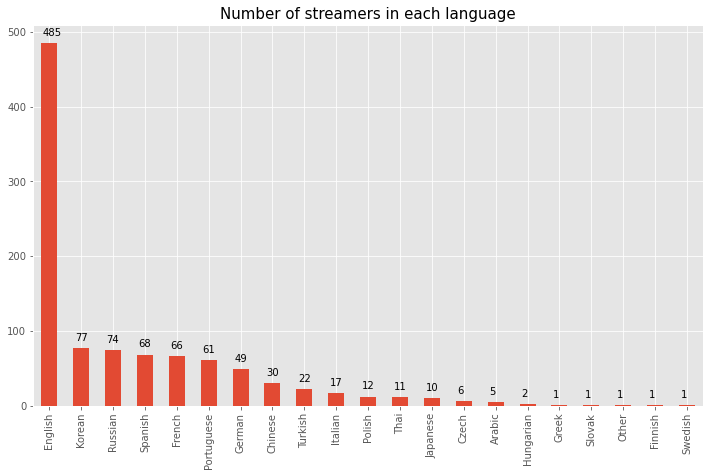

In [369]:
plt.figure(figsize=(12,7))
ax=df['language'].value_counts().plot(kind='bar')
for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_height()+10,s=i.get_height(),fontsize=10)
ax.set_title('Number of streamers in each language',fontsize=15);

There are large number of languages and half of them contains a small number of streamrs, so it would be appropriate to shortage the unique values and keep those who has at least 15 streamers

In [370]:
lang_count=df['language'].value_counts()
ind_lang=lang_count[lang_count<15].index
df['language']=df['language'].apply(lambda w:'Other' if w in ind_lang else w)

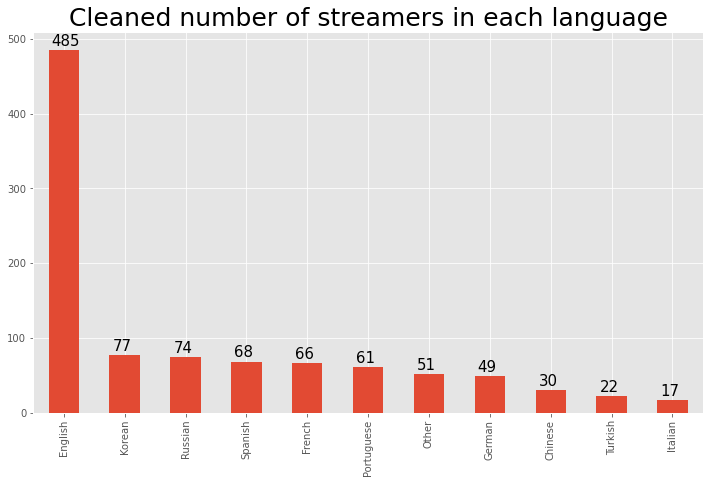

In [371]:
plt.figure(figsize=(12,7))
ax=df['language'].value_counts().plot(kind='bar')
for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_height()+6,s=i.get_height(),fontsize=15)
ax.set_title('Cleaned number of streamers in each language',fontsize=25);

Now we reduced the number of countries. As we can clearly see there are a lot of English streamers\
Lets compare Watched time per streamer and his time of making content

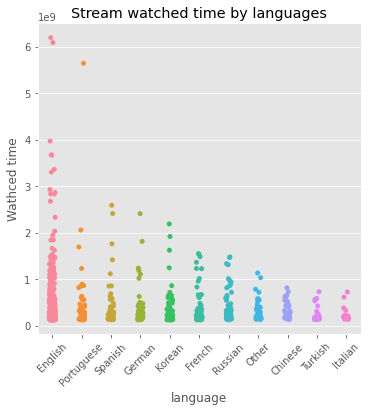

In [372]:
sns.catplot(x='language',y='time_watch',data=df)
plt.title('Stream watched time by languages')
plt.ylabel('Wathced time')
plt.xticks(rotation=45);

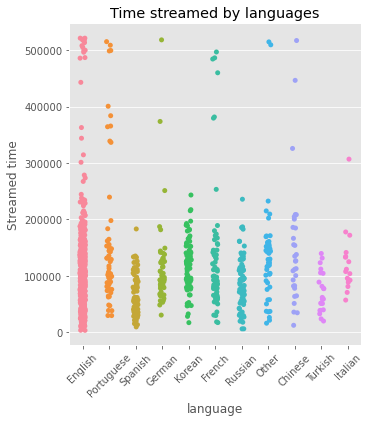

In [373]:
sns.catplot(x='language',y='time_stream',data=df)
plt.title('Time streamed by languages')
plt.ylabel('Streamed time')
plt.xticks(rotation=45);

Quite interesting insights... As we can see almost all countries have outliers. People who stream more than average time, unfortunately, have a small number of watchers. Only english streamers has a positive correlation between streamed and watched time\
Apparently, there is strong correlation between Streamed time and Watched time for English language\
Italian community has a sad case, despite the fact that most of the streamers spend average 150k minutes to make a content, there are a small number of people who watch them. It might imply that there is one of the most unpopular field\
Only one Portuguese streamer has a highest value of watchers compared to others, lets find him

In [374]:
def find_outlier(lang,col):
    out=df[(df['language']==lang)&(df[col]==df[(df['language']==lang)]\
                                       [col].max())]
    return out

In [375]:
find_outlier('Portuguese','time_watch')

,channel,time_watch,time_stream,viewers_peak,avg_viewers,followers,follower_gained,views_gained,partner,mature,language
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese


Indeed, he is only one who gained so many watchers along with long streaming time among Portuguese people

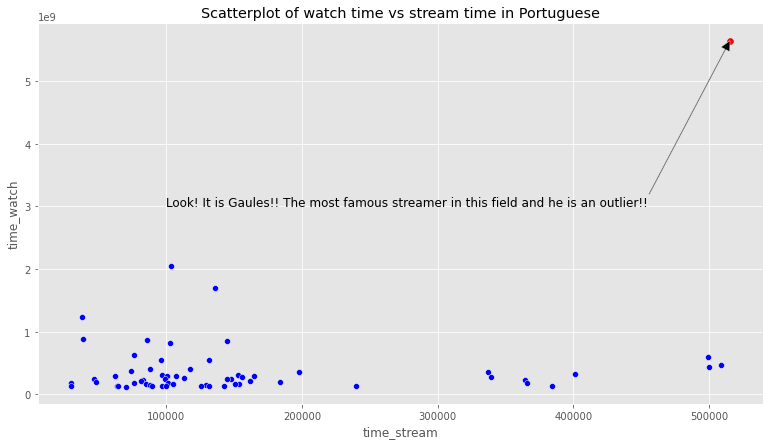

In [376]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='time_stream',y='time_watch',data=df[df['language']=='Portuguese'],color='blue')
plt.annotate('Look! It is Gaules!! The most famous streamer in this field and he is an outlier!!'\
             ,xy=(find_outlier('Portuguese','time_watch')['time_stream'],find_outlier('Portuguese','time_watch')['time_watch'])\
             ,xytext=(100000,3000000000),arrowprops={'facecolor':'black'\
                                                                                   ,'headlength':10\
                                                                                   ,'headwidth':10\
                                                                                   ,'width':1},fontsize=12)
plt.scatter(x=find_outlier('Portuguese','time_watch')['time_stream']\
            ,y=find_outlier('Portuguese','time_watch')['time_watch'],color='r')
plt.title('Scatterplot of watch time vs stream time in Portuguese');

Lets do the same thing with English audience

In [377]:
most_viewed=df[df['language']=='English'].sort_values(by='time_watch',ascending=False).head(2)
most_viewed_color_one=most_viewed[most_viewed['channel']=='xQcOW']
most_viewed_color_two=most_viewed[most_viewed['channel']=='summit1g']
most_viewed

,channel,time_watch,time_stream,viewers_peak,avg_viewers,followers,follower_gained,views_gained,partner,mature,language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English


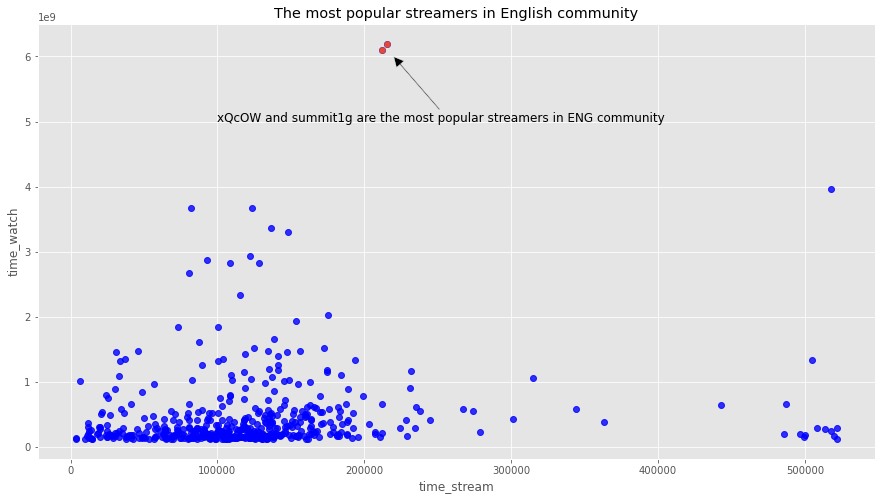

In [378]:
plt.figure(figsize=(15,8))
sns.regplot(x='time_stream',y='time_watch',data=df[df['language']=='English'],fit_reg=False,color='blue')
plt.scatter(x=[most_viewed_color_one['time_stream'].values,most_viewed_color_two['time_stream'].values]\
            ,y=[most_viewed_color_one['time_watch'],most_viewed_color_two['time_watch']])
plt.annotate('xQcOW and summit1g are the most popular streamers in ENG community'\
             ,xy=(220000,5996161750)\
             ,xytext=(100000,5000000000),arrowprops={'facecolor':'black'\
                                                                                   ,'headlength':10\
                                                                                   ,'headwidth':10\
                                                                                   ,'width':1},fontsize=12)
plt.title('The most popular streamers in English community');

Despite the fact that now we have to outliers, the correlation between watch time and stream time doesnt seem strong, as we expected. Our assumption that these both features are changing at the same time into one direction is not true anymore, but this is just a sample

Now lets consider whether the partnership really helps streamers to gain some key metrcis of success

First of all lets check the proportion

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


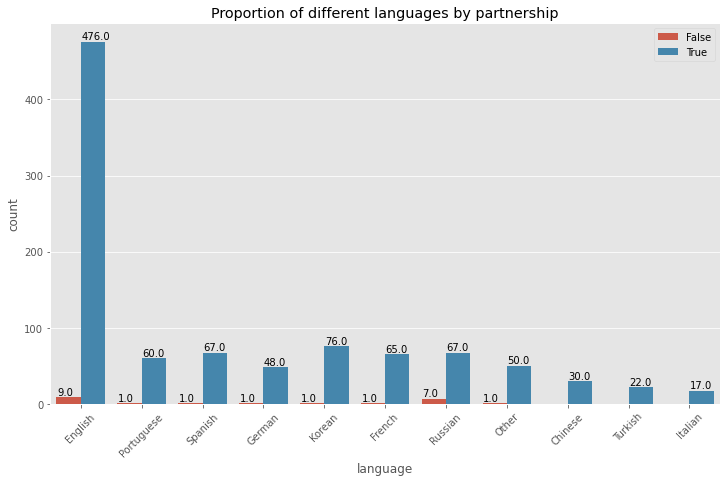

In [379]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x='language',hue='partner',data=df)
plt.xticks(rotation=45)
plt.title('Proportion of different languages by partnership')
plt.legend(loc='upper right')
for i in ax.patches:
    ax.text(x=i.get_x()+0.01,y=i.get_height()+3,s=i.get_height(),fontsize=10);

There are to many streamers who have a partnership with other channels, probably they consider it profitable feature in terms of key metrics\
Lets find out!!

In [380]:
col=['avg_viewers','follower_gained','followers','views_gained'] ##Key metrics

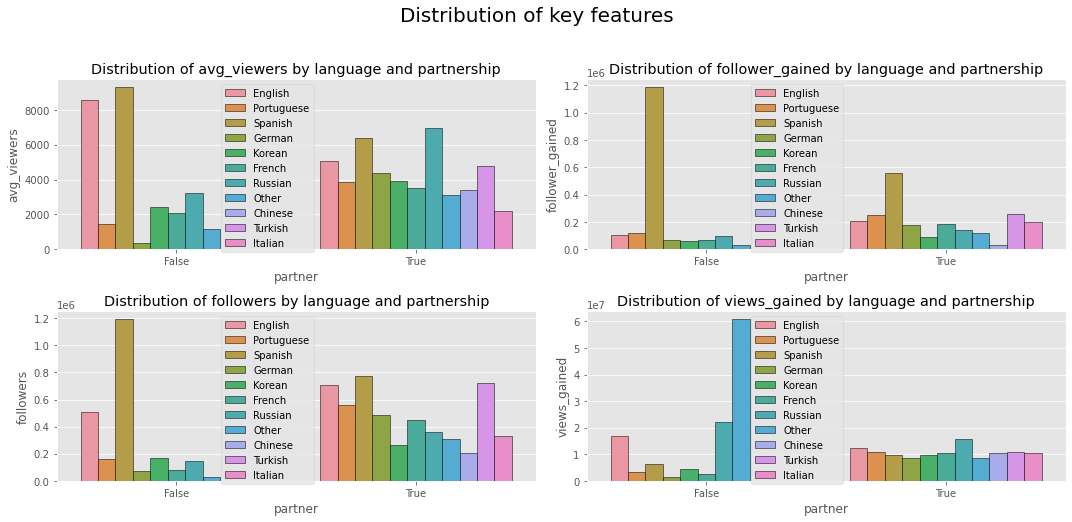

In [381]:
f=plt.figure(figsize=(15,7))
for i,feature in enumerate(col):
    f.add_subplot(2,2,i+1)
    ax=sns.barplot(x='partner',y=feature,data=df,hue='language',edgecolor='black',ci=False)
    ax.figure.suptitle('Distribution of key features',y=1.03,fontsize=20)
    plt.legend(bbox_to_anchor =(0.44,1),loc='upper center',shadow=False)
    plt.title('Distribution of '+feature+' by language and partnership')
plt.tight_layout();

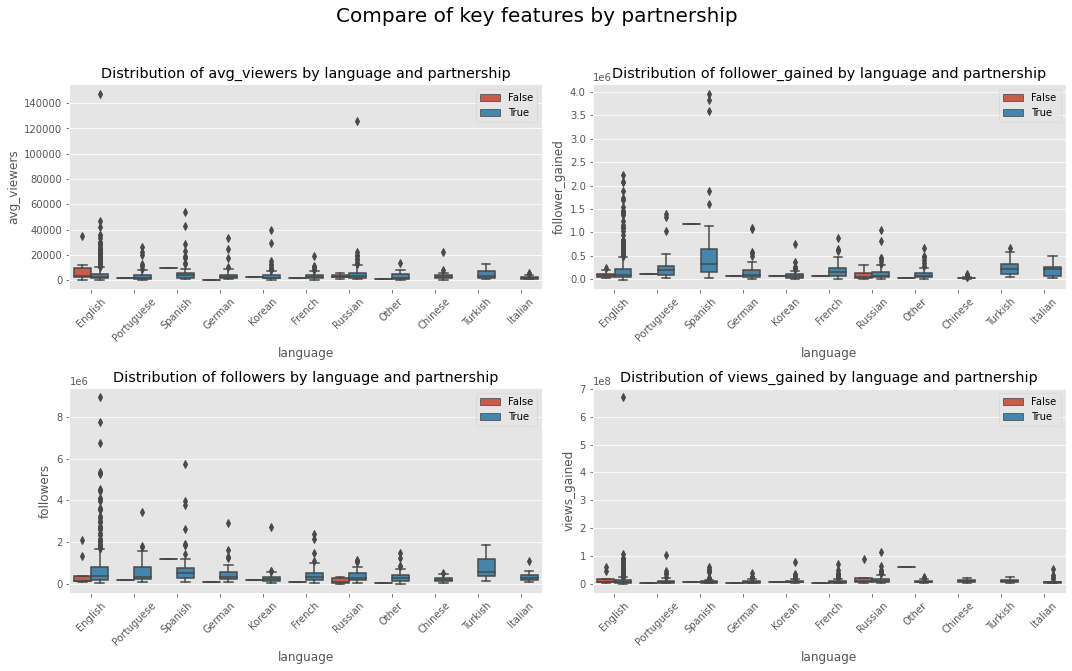

In [382]:
f=plt.figure(figsize=(15,9))
for i,feature in enumerate(col):
    f.add_subplot(2,2,i+1)
    ax=sns.boxplot(x='language',y=feature,data=df,hue='partner')
    ax.figure.suptitle('Compare of key features by partnership',y=1.03,fontsize=20)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right',shadow=False)
    plt.title('Distribution of '+feature+' by language and partnership')
plt.tight_layout();


Well, as we see in most of the cases the presence of partnership really helps streamers to gain followers and views, BUT except for Spanish audience (and partially in English)\
Its quite an interesting insight, however, there is only one guy who has such high metrics, and probably it is not connected to absence of partnership, so it is just an outlier

Lets conduct same procedure with "mature" feature

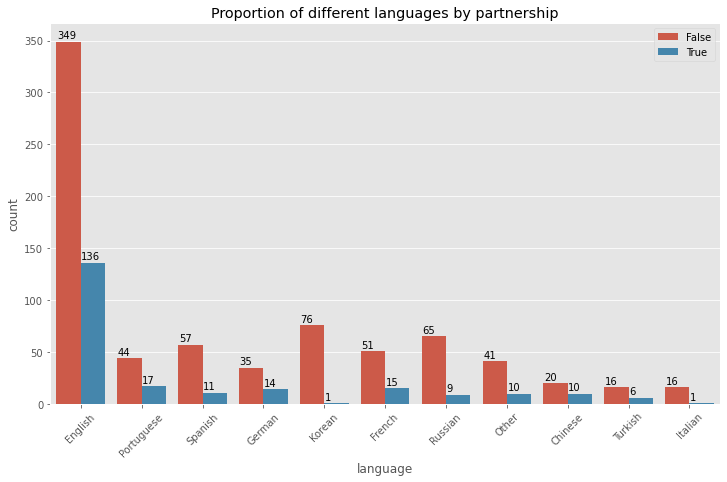

In [383]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x='language',hue='mature',data=df)
plt.xticks(rotation=45)
plt.title('Proportion of different languages by partnership')
plt.legend(loc='upper right')
for i in ax.patches:
    ax.text(x=i.get_x()+0.01,y=i.get_height()+3,s=i.get_height(),fontsize=10);

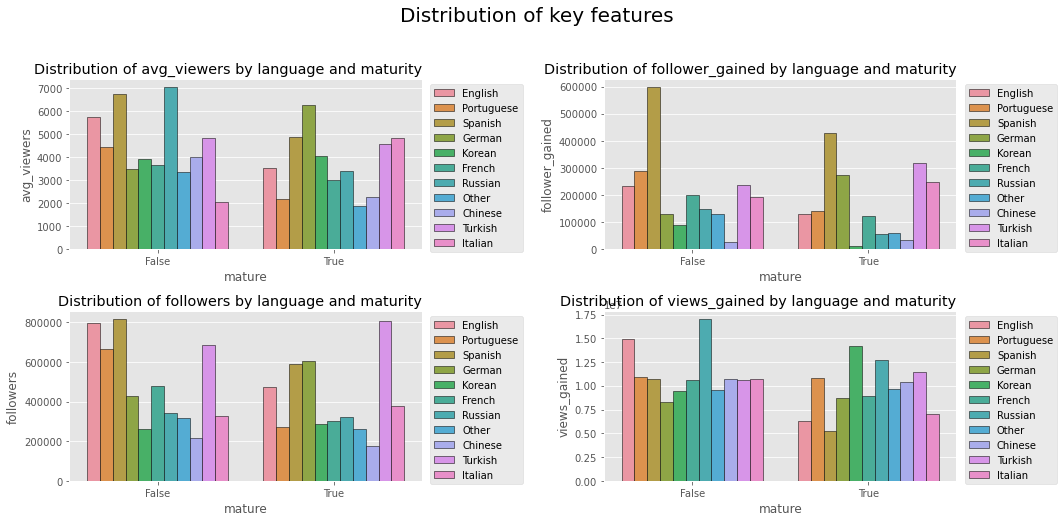

In [384]:
f=plt.figure(figsize=(15,7))
for i,feature in enumerate(col):
    f.add_subplot(2,2,i+1)
    ax=sns.barplot(x='mature',y=feature,data=df,hue='language',edgecolor='black',ci=False)
    ax.figure.suptitle('Distribution of key features',y=1.03,fontsize=20)
    plt.legend(bbox_to_anchor =(1.3,1),loc='upper right',shadow=False)
    plt.title('Distribution of '+feature+' by language and maturity',loc='right')
plt.tight_layout();

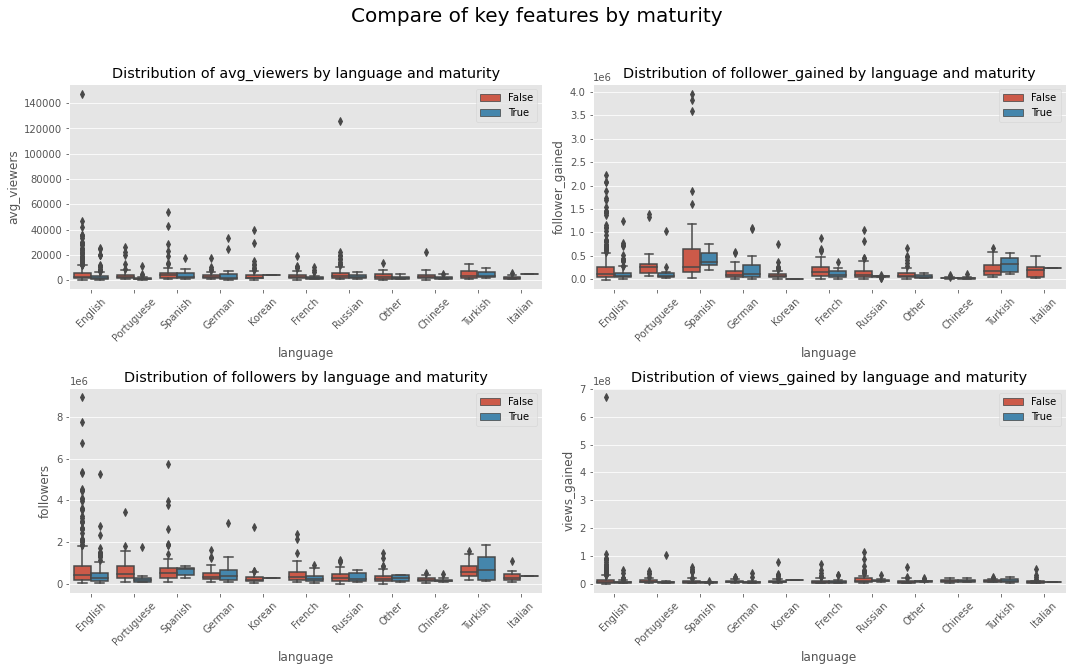

In [385]:
f=plt.figure(figsize=(15,9))
for i,feature in enumerate(col):
    f.add_subplot(2,2,i+1)
    ax=sns.boxplot(x='language',y=feature,data=df,hue='mature')
    ax.figure.suptitle('Compare of key features by maturity',y=1.03,fontsize=20)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right',shadow=False)
    plt.title('Distribution of '+feature+' by language and maturity')
plt.tight_layout();


Despite the fact that Non-mature channels more than mature, there is ambiguous picture in terms of metrics.\
There is no clear pattern whether the maturity impact or not as for partnership. However, since our main metric is number of followers, we can trace a slight prevailence of Non-mature channels thrughout of languages

For final step, lets analyse some general information

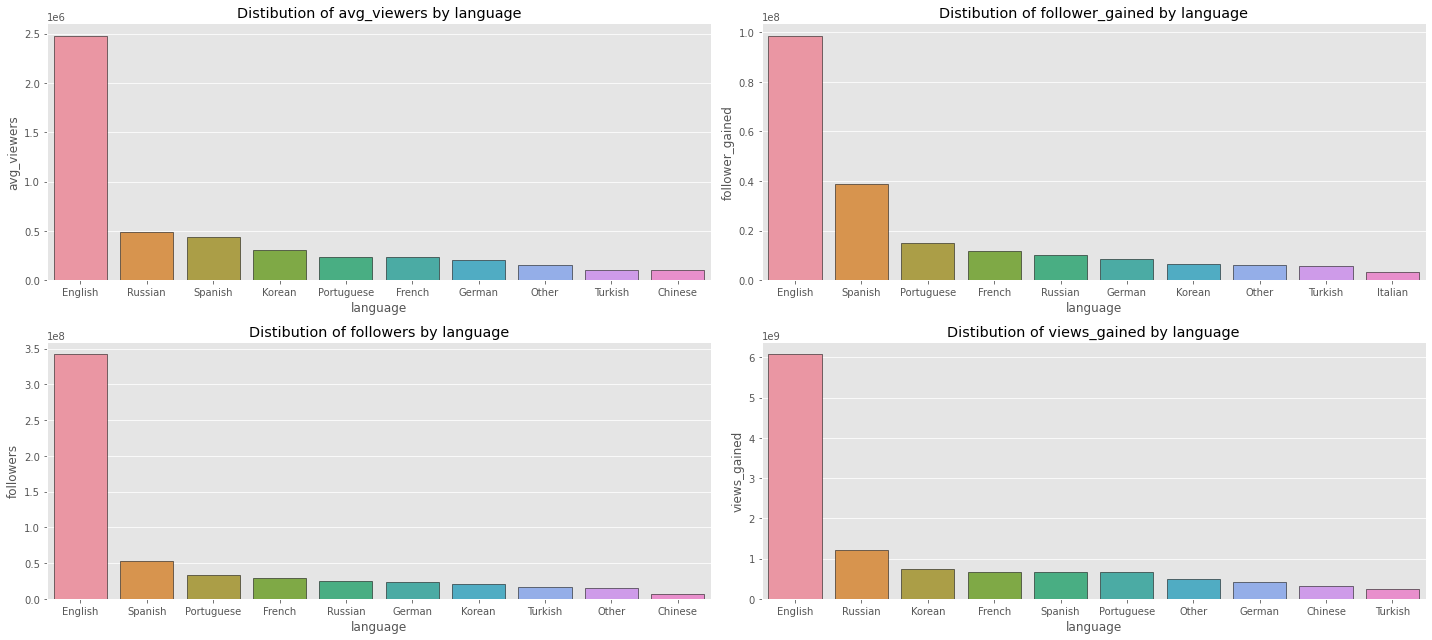

In [386]:
f=plt.figure(figsize=(20,9))
for i,cols in enumerate(col):
    ax=f.add_subplot(2,2,i+1)
    ww=df.groupby('language')[cols].sum().sort_values(ascending=False)[:10]
    ww_df=pd.DataFrame(ww.reset_index())
    sns.barplot(x='language',y=cols,data=ww_df,ax=ax,edgecolor='black')
    plt.title('Distibution of '+cols+' by language')
f.tight_layout();

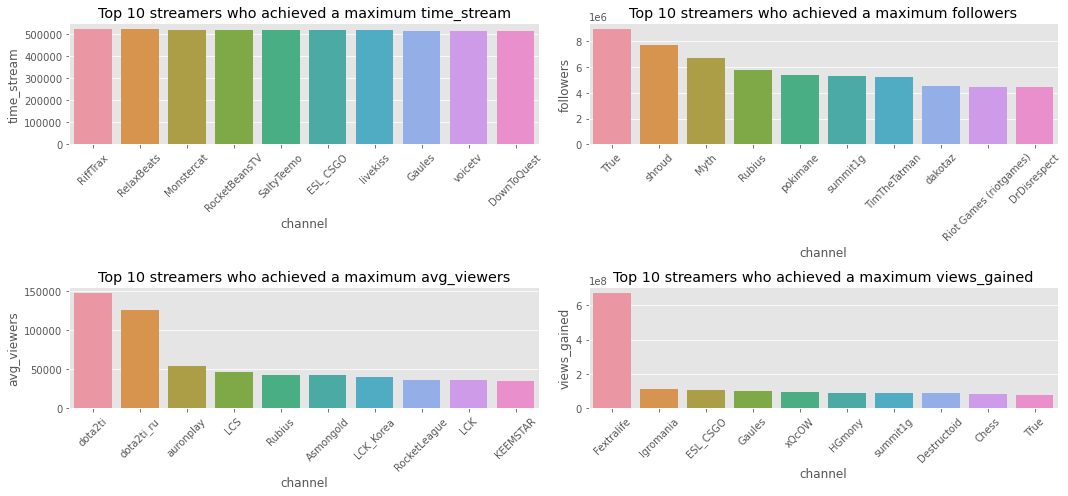

In [387]:
f=plt.figure(figsize=(15,7))
for i,cols in enumerate(['time_stream','followers','avg_viewers','views_gained']):
    f.add_subplot(2,2,i+1)
    sns.barplot(x='channel',y=cols,data=df[[cols,'channel']]\
               .sort_values(cols,ascending=False)[:10])
    plt.title('Top 10 streamers who achieved a maximum ' + cols)
    plt.xticks(rotation=45)
f.tight_layout();

C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50753 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44403 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: 

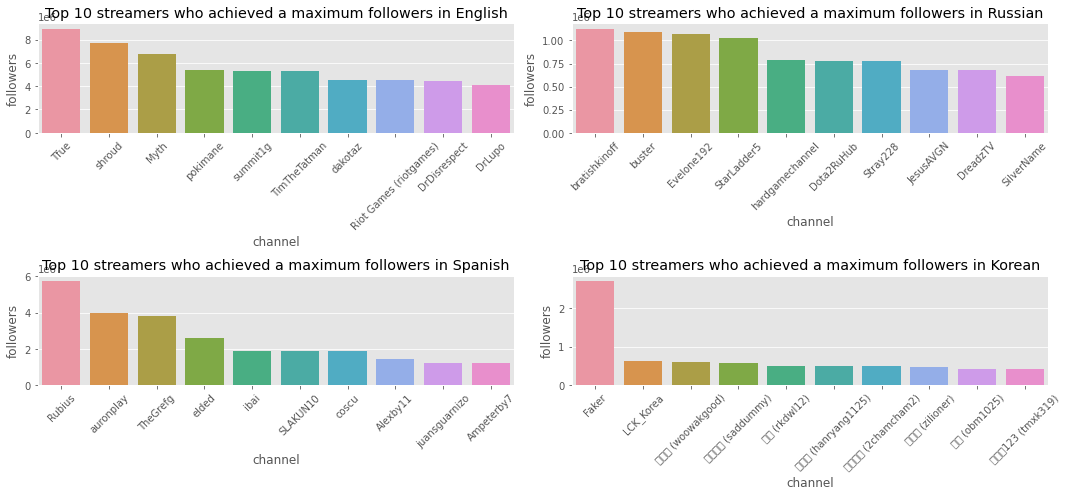

In [388]:
f=plt.figure(figsize=(15,7))
for i,cols in enumerate(['English','Russian','Spanish','Korean']):
    f.add_subplot(2,2,i+1)
    sns.barplot(x='channel',y='followers',data=df[df['language']==cols]\
               .sort_values('followers',ascending=False)[:10])
    plt.title('Top 10 streamers who achieved a maximum followers in '+cols)
    plt.xticks(rotation=45)
f.tight_layout();